In [1]:
import pint.toa as toa
import pint.models as models
import pint.residuals as r
import pint.fitter as fit

import matplotlib.pyplot as plt

import astropy.units as u

In [2]:
t = toa.get_TOAs("./datafiles/PvT/B1112+50_test_t2.tim", planets=False, include_bipm=False, usepickle=False)

Data points out of range in clock file '/home/andr/.pyenv/versions/miniconda3-4.7.12/lib/python3.7/site-packages/pint/data/runtime/time.dat'
No ephemeris provided to TOAs object or compute_TDBs. Using DE421


In [3]:
t.print_summary()

Number of TOAs:  132
Number of commands:  1
Number of observatories: 1 ['prao']
MJD span:  58139.983 to 58503.986
Date span: 2018-01-21 23:35:13.576078752 to 2019-01-20 23:40:10.472471844
prao TOAs (132):
  Min freq:      111.879 MHz
  Max freq:      111.879 MHz
  Min error:     20.6 us
  Max error:     314 us
  Median error:  77.5 us



In [4]:
m = models.get_model("./datafiles/1112.par")

In [5]:
print(m.as_parfile())

# Created: 2021-12-03T18:32:13.957704
# PINT_version: 0.8.4
# User: andr
# Host: DESKTOP-HUDHOJ4
# OS: Linux-4.4.0-19041-Microsoft-x86_64-with-debian-bullseye-sid
PSR                              J1112+50
DILATEFREQ                              N
DMDATA                                  N
NTOA                                    0
CHI2                                  0.0
RAJ                     11:15:38.40000000 1 0.00000000000000000000
DECJ                    50:30:12.29000000 1 0.00000000000000000000
PMRA                                  0.0
PMDEC                                 0.0
PX                                    0.0
F0                  0.6037044172605999792 1 0.0
F1              -9.085179999999999847e-16 1 0.0
PEPOCH             49334.0000000000000000
PLANET_SHAPIRO                          N
DM                                    9.0



In [6]:
ds = m.delay(t)

Text(0, 0.5, 'Delay ($\\mu$s)')

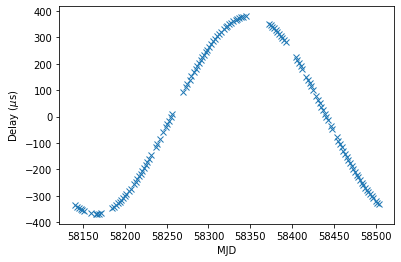

In [7]:
plt.plot(t.get_mjds(high_precision=False), ds, "x")
plt.xlabel("MJD")
plt.ylabel("Delay ($\mu$s)")

In [8]:
rs = r.Residuals(t, m)

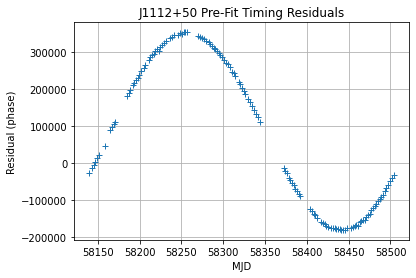

In [9]:
plt.plot( rs.toas.get_mjds(), rs.time_resids.to(u.us), '+')
plt.title("%s Pre-Fit Timing Residuals" % m.PSR.value)
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [10]:
f = fit.WLSFitter(t, m)
f.fit_toas()

179770.97201696259435

In [11]:

print(
    "Best fit has reduced chi^2 of {:.3f} ({} dof)".format(
        f.resids.chi2_reduced, f.resids.dof
    )
)
# Notice that the residuals have units, since they are astropy Quantities
print("RMS in phase is", f.resids.phase_resids.std())
print("RMS in time is", f.resids.time_resids.std().to(u.us))
print("\n Best model is:")
print(f.model.as_parfile())

Best fit has reduced chi^2 of 1415.519 (127 dof)
RMS in phase is 0.0015395195508936827
RMS in time is 2550.12436202129 us

 Best model is:
# Created: 2021-12-03T18:32:43.095682
# PINT_version: 0.8.4
# User: andr
# Host: DESKTOP-HUDHOJ4
# OS: Linux-4.4.0-19041-Microsoft-x86_64-with-debian-bullseye-sid
PSR                              J1112+50
EPHEM                               DE421
CLOCK                             TT(TAI)
START              58139.9827960194300001
FINISH             58503.9862323202759723
DILATEFREQ                              N
DMDATA                                  N
NTOA                                  132
CHI2                                  0.0
RAJ                     11:15:28.40225877 1 0.00115139037615029577
DECJ                    50:31:07.35206625 1 0.01167314241335176694
PMRA                                  0.0
PMDEC                                 0.0
PX                                    0.0
F0                 0.60370442734391471795 1 2.17774564907526

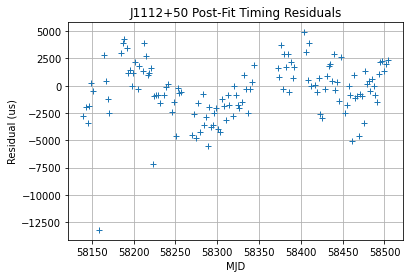

In [12]:
plt.plot(
    t.get_mjds(), f.resids.time_resids.to(u.us), '+')
plt.title("%s Post-Fit Timing Residuals" % m.PSR.value)
plt.xlabel("MJD")
plt.ylabel("Residual (us)")
plt.grid()

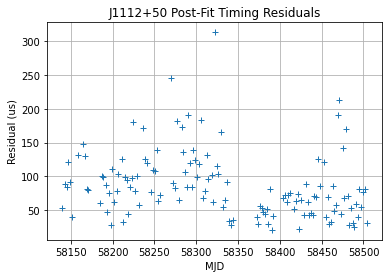

In [13]:
plt.plot(
    t.get_mjds(), t.get_errors(), '+')
plt.title("%s Post-Fit Timing Residuals" % m.PSR.value)
plt.xlabel("MJD")
plt.ylabel("Residual (us)")
plt.grid()

In [14]:
print(f.model.as_parfile())

# Created: 2021-12-03T18:33:02.735248
# PINT_version: 0.8.4
# User: andr
# Host: DESKTOP-HUDHOJ4
# OS: Linux-4.4.0-19041-Microsoft-x86_64-with-debian-bullseye-sid
PSR                              J1112+50
EPHEM                               DE421
CLOCK                             TT(TAI)
START              58139.9827960194300001
FINISH             58503.9862323202759723
DILATEFREQ                              N
DMDATA                                  N
NTOA                                  132
CHI2                                  0.0
RAJ                     11:15:28.40225877 1 0.00115139037615029577
DECJ                    50:31:07.35206625 1 0.01167314241335176694
PMRA                                  0.0
PMDEC                                 0.0
PX                                    0.0
F0                 0.60370442734391471795 1 2.1777456490752633198e-10
F1              -9.213985153499124824e-16 1 2.8020963966413005174e-19
PEPOCH             49334.0000000000000000
PLANET_SHAPIRO   

In [15]:
%%time
f = fit.WLSFitter(t, m)
f.fit_toas()

CPU times: user 156 ms, sys: 0 ns, total: 156 ms
Wall time: 153 ms


179770.97201696259435

In [58]:
27/60

0.45